In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Main goal of the project:
### Detect the trend of changes in the level of happiness and the level of suicide in different regions and countries

---
# Data import
---

---
# 1. Reading commodity dataset and from all the dates pick only year by mean value of prices

In [38]:
# https://www.kaggle.com/datasets/prasertk/historical-commodity-prices-from-20002022
df_commodity = pd.read_csv("commodity 2000-2022.csv")
df_commodity

,Symbol,Date,Open,High,Low,Close,Volume
0,Gold,2000-01-04,281.00,281.00,281.00,282.70,4
1,Gold,2000-01-05,283.20,283.20,283.20,281.10,16
2,Gold,2000-01-06,281.40,281.40,281.40,281.40,0
3,Gold,2000-01-07,281.90,281.90,281.90,281.90,0
4,Gold,2000-01-10,281.70,281.70,281.70,281.70,0
...,...,...,...,...,...,...,...
29930,US Wheat,2022-04-04,989.50,1014.50,984.75,1010.25,0
29931,US Wheat,2022-04-05,1020.50,1074.00,1020.00,1045.25,0
29932,US Wheat,2022-04-06,1049.40,1056.40,1024.25,1041.12,0
29933,US Wheat,2022-04-07,1040.25,1044.50,1017.75,1020.00,0


,Symbol,Date,Open,High,Low,Close,Volume
0,Gold,2000-01-04,281.00,281.00,281.00,282.70,4
1,Gold,2000-01-05,283.20,283.20,283.20,281.10,16
2,Gold,2000-01-06,281.40,281.40,281.40,281.40,0
3,Gold,2000-01-07,281.90,281.90,281.90,281.90,0
4,Gold,2000-01-10,281.70,281.70,281.70,281.70,0
...,...,...,...,...,...,...,...
29930,US Wheat,2022-04-04,989.50,1014.50,984.75,1010.25,0
29931,US Wheat,2022-04-05,1020.50,1074.00,1020.00,1045.25,0
29932,US Wheat,2022-04-06,1049.40,1056.40,1024.25,1041.12,0
29933,US Wheat,2022-04-07,1040.25,1044.50,1017.75,1020.00,0


### In this dataset we have dates with actual dates of month and month, but we only interested in years, so we grouped our data by name (symbol) and year and take median value from it

In [39]:
df_commodity['Date'] = pd.DatetimeIndex(pd.to_datetime(df_commodity['Date'], format='%Y-%m-%d')).year
# Group by name of product ( Symbol ) and year, then take median from it
df_commodity = df_commodity.groupby(['Symbol', 'Date']).median().reset_index().rename(columns={"Date": "Year"})
# Check do we have any NaN values
df_commodity.isna().sum()
# Check types and count non-null values
df_commodity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  123 non-null    object 
 1   Year    123 non-null    int64  
 2   Open    123 non-null    float64
 3   High    123 non-null    float64
 4   Low     123 non-null    float64
 5   Close   123 non-null    float64
 6   Volume  123 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  123 non-null    object 
 1   Year    123 non-null    int64  
 2   Open    123 non-null    float64
 3   High    123 non-null    float64
 4   Low     123 non-null    float64
 5   Close   123 non-null    float64
 6   Volume  123 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 6.9+ KB


---
# 2. Reading happiness rank dataset

In [40]:
# https://www.kaggle.com/datasets/mayzannilarthein44/world-happiness-report-2015-to-2022
df_happiness = pd.read_csv("world-happiness-report-2015-2022-cleaned.csv")
print(df_happiness.info())
df_happiness.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB
None


Unnamed: 0                       0
Happiness Rank                   0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB
None


Unnamed: 0                       0
Happiness Rank                   0
Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

### In this case we have some float numbers writen with ',' instead of '.', and we need to replace these comas by dots and then covert types from objects to numeric.

In [41]:
# Check types and count non-null values
df_happiness.info()
# Take only columns that needed to be fload instead of objects
cols = ['Happiness Score','Economy (GDP per Capita)', 'Family (Social Support)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Replace comas by dots
df_h = df_happiness[cols].apply(lambda x: x.str.replace(',','.'))
# Converting all objects to numeric types
df_h = df_h.apply(pd.to_numeric, errors='coerce', axis=1)
# Merging remaining columns with converted to get full dataset
df_happiness = pd.merge(df_h.reset_index(), df_happiness[['Year', 'Region', 'Country', 'Happiness Rank']].reset_index(), on='index')
# Check types and count non-null values
df_happiness.info()
# Check do we have any NaN values
df_happiness.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB
<class 'pandas.

index                            0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
Region                           0
Country                          0
Happiness Rank                   0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     1229 non-null   int64 
 1   Happiness Rank                 1229 non-null   int64 
 2   Country                        1229 non-null   object
 3   Region                         1229 non-null   object
 4   Happiness Score                1229 non-null   object
 5   Economy (GDP per Capita)       1229 non-null   object
 6   Family (Social Support)        1229 non-null   object
 7   Health (Life Expectancy)       1229 non-null   object
 8   Freedom                        1229 non-null   object
 9   Trust (Government Corruption)  1229 non-null   object
 10  Generosity                     1229 non-null   object
 11  Year                           1229 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 115.3+ KB
<class 'pandas.

index                            0
Happiness Score                  0
Economy (GDP per Capita)         0
Family (Social Support)          0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
Region                           0
Country                          0
Happiness Rank                   0
dtype: int64

# Reading suicide homocide rank dataset

In [42]:
# https://www.kaggle.com/datasets/prasertk/homicide-suicide-rate-and-gdp
df_suicide = pd.read_csv("suicide homicide gdp.csv")
# Capitalizing column names
df_suicide = df_suicide.rename(columns={"year": "Year", "country": "Country"})
# Rename Russia because it was named like "Russia Federation" in this dataset, but in another dataset Russia was named like "Russia" and in future we will merge these two datasets on column ("Country")
df_suicide.loc[df_suicide['iso2c'] == 'RU','Country'] = 'Russia'
df_suicide


,Country,iso3c,iso2c,Year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


,Country,iso3c,iso2c,Year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,NaN,16.8,2.054868e+10,2806.469032,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,NaN,15.0,1.758489e+10,3795.642431,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,NaN,14.0,1.811554e+10,4017.221716,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,NaN,14.1,1.928429e+10,3783.547898,Sub-Saharan Africa (excluding high income),Lower middle income


---
# 3. Reading countries oil production dataset

In [43]:
# https://www.kaggle.com/datasets/caesarmario/oecd-data-crude-oil-production
df_oil_prod = pd.read_csv("countries_oi_production.csv")
df_oil_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    8236 non-null   object 
 1   INDICATOR   8236 non-null   object 
 2   SUBJECT     8236 non-null   object 
 3   MEASURE     8236 non-null   object 
 4   FREQUENCY   8236 non-null   object 
 5   TIME        8236 non-null   int64  
 6   Value       6104 non-null   float64
 7   Flag Codes  2132 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 514.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    8236 non-null   object 
 1   INDICATOR   8236 non-null   object 
 2   SUBJECT     8236 non-null   object 
 3   MEASURE     8236 non-null   object 
 4   FREQUENCY   8236 non-null   object 
 5   TIME        8236 non-n

### Filtering dataset by year

In [44]:
df_oil_prod = df_oil_prod[df_oil_prod['TIME'] > 2010]

### Rename columns for future merging and merge. At first, we merge by iso3c using dataset with suicides and GDP, because in this data set we have both iso3c and Country names. Next, we merge by Country to get region using world happiness dataset.

In [45]:
df_oil_prod.rename(columns={'TIME': 'Year', 'LOCATION': 'iso3c'}, inplace=True)
df_oil_prod = pd.merge(df_oil_prod, df_suicide[df_suicide['Year'] == 2019][['iso3c', 'Country']], on='iso3c')
df_oil_prod = pd.merge(df_oil_prod, df_happiness[df_happiness['Year'] == 2019][['Region', 'Country']], on='Country')
df_oil_prod

,iso3c,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Year,Value,Flag Codes,Country,Region
0,AUS,OILPROD,TOT,KTOE,A,2011,22232.029,NaN,Australia,Australia and New Zealand
1,AUS,OILPROD,TOT,KTOE,A,2012,20728.672,NaN,Australia,Australia and New Zealand
2,AUS,OILPROD,TOT,KTOE,A,2013,17979.347,NaN,Australia,Australia and New Zealand
3,AUS,OILPROD,TOT,KTOE,A,2014,16925.631,NaN,Australia,Australia and New Zealand
4,AUS,OILPROD,TOT,KTOE,A,2015,16159.770,NaN,Australia,Australia and New Zealand
...,...,...,...,...,...,...,...,...,...,...
807,ZWE,OILPROD,TOT,KTOE,A,2013,0.000,NaN,Zimbabwe,Sub-Saharan Africa
808,ZWE,OILPROD,TOT,KTOE,A,2014,0.000,NaN,Zimbabwe,Sub-Saharan Africa
809,ZWE,OILPROD,TOT,KTOE,A,2015,0.000,NaN,Zimbabwe,Sub-Saharan Africa
810,ZWE,OILPROD,TOT,KTOE,A,2016,0.000,NaN,Zimbabwe,Sub-Saharan Africa


,iso3c,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Year,Value,Flag Codes,Country,Region
0,AUS,OILPROD,TOT,KTOE,A,2011,22232.029,NaN,Australia,Australia and New Zealand
1,AUS,OILPROD,TOT,KTOE,A,2012,20728.672,NaN,Australia,Australia and New Zealand
2,AUS,OILPROD,TOT,KTOE,A,2013,17979.347,NaN,Australia,Australia and New Zealand
3,AUS,OILPROD,TOT,KTOE,A,2014,16925.631,NaN,Australia,Australia and New Zealand
4,AUS,OILPROD,TOT,KTOE,A,2015,16159.770,NaN,Australia,Australia and New Zealand
...,...,...,...,...,...,...,...,...,...,...
807,ZWE,OILPROD,TOT,KTOE,A,2013,0.000,NaN,Zimbabwe,Sub-Saharan Africa
808,ZWE,OILPROD,TOT,KTOE,A,2014,0.000,NaN,Zimbabwe,Sub-Saharan Africa
809,ZWE,OILPROD,TOT,KTOE,A,2015,0.000,NaN,Zimbabwe,Sub-Saharan Africa
810,ZWE,OILPROD,TOT,KTOE,A,2016,0.000,NaN,Zimbabwe,Sub-Saharan Africa


---
# 4. Reading suicide rate by female and male

In [46]:
# https://www.kaggle.com/datasets/nourajo/suicide-rates-worldwide-20002019
# We're skipping first row cause header in this data set starting in the second row
df_mf_suicides = pd.read_csv("suicide_rate_for_sexes.csv", skiprows=1)
df_mf_suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       3660 non-null   object
 1   Year          3660 non-null   int64 
 2   Both sexes    3660 non-null   object
 3   Male          3660 non-null   object
 4   Female        3660 non-null   object
 5   Both sexes.1  3660 non-null   object
 6   Male.1        3660 non-null   object
 7   Female.1      3660 non-null   object
dtypes: int64(1), object(7)
memory usage: 228.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       3660 non-null   object
 1   Year          3660 non-null   int64 
 2   Both sexes    3660 non-null   object
 3   Male          3660 non-null   object
 4   Female        3660 non-null   object
 5   Both sexes.1  366

### As we can see our desired columns Male.1, Female.1 are objects, and we need to get float numbers from then

In [47]:
df_mf_suicides

,Country,Year,Both sexes,Male,Female,Both sexes.1,Male.1,Female.1
0,Afghanistan,2019,35.3 [21.8-49.8],34.4 [21.9-47.9],36.2 [21.7-51.6],4.1 [2.3-7.0],4.6 [2.6-7.9],3.6 [2.0-5.9]
1,Afghanistan,2018,35.4 [21.7-50.1],34.7 [22.0-48.5],36.0 [21.4-51.6],4.1 [2.3-6.8],4.6 [2.6-7.8],3.5 [2.0-5.8]
2,Afghanistan,2017,35.5 [21.7-50.4],35.0 [22.0-49.1],35.9 [21.3-51.7],4.1 [2.3-6.8],4.6 [2.7-7.9],3.4 [2.0-5.7]
3,Afghanistan,2016,35.6 [21.6-50.7],35.1 [22.0-49.4],36.0 [21.2-51.9],4.0 [2.3-6.7],4.4 [2.6-7.4],3.6 [2.1-5.9]
4,Afghanistan,2015,35.6 [21.6-50.8],35.4 [22.3-49.8],35.7 [21.0-51.7],4.0 [2.3-6.6],4.3 [2.5-7.3],3.6 [2.0-5.9]
...,...,...,...,...,...,...,...,...
3655,Zimbabwe,2004,24.5 [15.7-35.3],24.6 [16.7-34.7],24.5 [15.0-35.8],14.2 [7.5-22.8],15.7 [8.4-24.2],12.7 [6.7-21.4]
3656,Zimbabwe,2003,23.1 [14.7-33.4],23.5 [15.9-33.3],22.7 [13.7-33.5],13.2 [6.9-21.1],15.1 [8.1-23.1],11.4 [5.7-19.3]
3657,Zimbabwe,2002,22.7 [14.4-32.9],24.1 [16.3-33.9],21.5 [13.0-32.0],13.4 [7.0-21.6],15.5 [8.3-23.6],11.4 [5.7-19.7]
3658,Zimbabwe,2001,21.7 [13.8-31.6],23.6 [16.0-33.2],20.2 [12.1-30.4],12.8 [6.6-20.9],14.4 [7.7-22.0],11.3 [5.4-19.8]


,Country,Year,Both sexes,Male,Female,Both sexes.1,Male.1,Female.1
0,Afghanistan,2019,35.3 [21.8-49.8],34.4 [21.9-47.9],36.2 [21.7-51.6],4.1 [2.3-7.0],4.6 [2.6-7.9],3.6 [2.0-5.9]
1,Afghanistan,2018,35.4 [21.7-50.1],34.7 [22.0-48.5],36.0 [21.4-51.6],4.1 [2.3-6.8],4.6 [2.6-7.8],3.5 [2.0-5.8]
2,Afghanistan,2017,35.5 [21.7-50.4],35.0 [22.0-49.1],35.9 [21.3-51.7],4.1 [2.3-6.8],4.6 [2.7-7.9],3.4 [2.0-5.7]
3,Afghanistan,2016,35.6 [21.6-50.7],35.1 [22.0-49.4],36.0 [21.2-51.9],4.0 [2.3-6.7],4.4 [2.6-7.4],3.6 [2.1-5.9]
4,Afghanistan,2015,35.6 [21.6-50.8],35.4 [22.3-49.8],35.7 [21.0-51.7],4.0 [2.3-6.6],4.3 [2.5-7.3],3.6 [2.0-5.9]
...,...,...,...,...,...,...,...,...
3655,Zimbabwe,2004,24.5 [15.7-35.3],24.6 [16.7-34.7],24.5 [15.0-35.8],14.2 [7.5-22.8],15.7 [8.4-24.2],12.7 [6.7-21.4]
3656,Zimbabwe,2003,23.1 [14.7-33.4],23.5 [15.9-33.3],22.7 [13.7-33.5],13.2 [6.9-21.1],15.1 [8.1-23.1],11.4 [5.7-19.3]
3657,Zimbabwe,2002,22.7 [14.4-32.9],24.1 [16.3-33.9],21.5 [13.0-32.0],13.4 [7.0-21.6],15.5 [8.3-23.6],11.4 [5.7-19.7]
3658,Zimbabwe,2001,21.7 [13.8-31.6],23.6 [16.0-33.2],20.2 [12.1-30.4],12.8 [6.6-20.9],14.4 [7.7-22.0],11.3 [5.4-19.8]


### At the beginning of each field there are avg numbers, we want to get them

In [48]:
temp = []
for number in df_mf_suicides['Male.1']:
    if type(number) == float:
        print(number)
    r,l = number.split(' ')
    temp.append(r)
df_mf_suicides['Male.1'] = temp

temp.clear()

for number in df_mf_suicides['Female.1']:
    if type(number) == float:
        print(number)
    r,l = number.split(' ')
    temp.append(r)

df_mf_suicides['Female.1'] = temp

df_mf_suicides

,Country,Year,Both sexes,Male,Female,Both sexes.1,Male.1,Female.1
0,Afghanistan,2019,35.3 [21.8-49.8],34.4 [21.9-47.9],36.2 [21.7-51.6],4.1 [2.3-7.0],4.6,3.6
1,Afghanistan,2018,35.4 [21.7-50.1],34.7 [22.0-48.5],36.0 [21.4-51.6],4.1 [2.3-6.8],4.6,3.5
2,Afghanistan,2017,35.5 [21.7-50.4],35.0 [22.0-49.1],35.9 [21.3-51.7],4.1 [2.3-6.8],4.6,3.4
3,Afghanistan,2016,35.6 [21.6-50.7],35.1 [22.0-49.4],36.0 [21.2-51.9],4.0 [2.3-6.7],4.4,3.6
4,Afghanistan,2015,35.6 [21.6-50.8],35.4 [22.3-49.8],35.7 [21.0-51.7],4.0 [2.3-6.6],4.3,3.6
...,...,...,...,...,...,...,...,...
3655,Zimbabwe,2004,24.5 [15.7-35.3],24.6 [16.7-34.7],24.5 [15.0-35.8],14.2 [7.5-22.8],15.7,12.7
3656,Zimbabwe,2003,23.1 [14.7-33.4],23.5 [15.9-33.3],22.7 [13.7-33.5],13.2 [6.9-21.1],15.1,11.4
3657,Zimbabwe,2002,22.7 [14.4-32.9],24.1 [16.3-33.9],21.5 [13.0-32.0],13.4 [7.0-21.6],15.5,11.4
3658,Zimbabwe,2001,21.7 [13.8-31.6],23.6 [16.0-33.2],20.2 [12.1-30.4],12.8 [6.6-20.9],14.4,11.3


,Country,Year,Both sexes,Male,Female,Both sexes.1,Male.1,Female.1
0,Afghanistan,2019,35.3 [21.8-49.8],34.4 [21.9-47.9],36.2 [21.7-51.6],4.1 [2.3-7.0],4.6,3.6
1,Afghanistan,2018,35.4 [21.7-50.1],34.7 [22.0-48.5],36.0 [21.4-51.6],4.1 [2.3-6.8],4.6,3.5
2,Afghanistan,2017,35.5 [21.7-50.4],35.0 [22.0-49.1],35.9 [21.3-51.7],4.1 [2.3-6.8],4.6,3.4
3,Afghanistan,2016,35.6 [21.6-50.7],35.1 [22.0-49.4],36.0 [21.2-51.9],4.0 [2.3-6.7],4.4,3.6
4,Afghanistan,2015,35.6 [21.6-50.8],35.4 [22.3-49.8],35.7 [21.0-51.7],4.0 [2.3-6.6],4.3,3.6
...,...,...,...,...,...,...,...,...
3655,Zimbabwe,2004,24.5 [15.7-35.3],24.6 [16.7-34.7],24.5 [15.0-35.8],14.2 [7.5-22.8],15.7,12.7
3656,Zimbabwe,2003,23.1 [14.7-33.4],23.5 [15.9-33.3],22.7 [13.7-33.5],13.2 [6.9-21.1],15.1,11.4
3657,Zimbabwe,2002,22.7 [14.4-32.9],24.1 [16.3-33.9],21.5 [13.0-32.0],13.4 [7.0-21.6],15.5,11.4
3658,Zimbabwe,2001,21.7 [13.8-31.6],23.6 [16.0-33.2],20.2 [12.1-30.4],12.8 [6.6-20.9],14.4,11.3


### Rename Russia Federation to Russia, and United States of America to the United States for future merging

In [49]:
df_mf_suicides.loc[df_mf_suicides['Country'] == 'Russian Federation','Country'] = 'Russia'
df_mf_suicides.loc[df_mf_suicides['Country'] == 'United States of America','Country'] = 'United States'

---
# 5. Reading crimes in US
### Then filter records by year from 2015 - 2019 and check for NaN values

In [50]:
# https://www.kaggle.com/datasets/tunguz/us-estimated-crimes?select=estimated_crimes_1979_2019.csv
df_us_crimes = pd.read_csv("estimated_crimes_us_1979_2019.csv")
# Filtering
df_us_crimes = df_us_crimes[df_us_crimes['year'] > 2014]
# Check if there are NaN values
# df_us_crimes.isna().sum()
df_us_crimes

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1856,2015,NaN,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
1857,2015,AK,Alaska,737709,5391,59,648.0,900.0,761,3671,20806,3511,15249,2046,NaN
1858,2015,AL,Alabama,4853875,22957,348,1449.0,2037.0,4612,15960,144785,35265,99182,10338,NaN
1859,2015,AR,Arkansas,2977853,15769,189,1425.0,2008.0,2117,11455,97391,22851,68720,5820,NaN
1860,2015,AZ,Arizona,6817565,27968,306,2268.0,3109.0,6360,18193,207184,38010,152388,16786,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,2019,WA,Washington,7614893,22377,198,NaN,3332.0,5147,13700,204224,34540,145282,24402,NaN
2112,2019,WI,Wisconsin,5822434,17070,175,NaN,2261.0,2991,11643,85672,12667,65620,7385,NaN
2113,2019,WV,West Virginia,1792147,5674,78,NaN,754.0,378,4464,28376,5891,20066,2419,NaN
2114,2019,WY,Wyoming,578759,1258,13,NaN,324.0,67,854,9093,1396,6984,713,NaN


,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1856,2015,NaN,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
1857,2015,AK,Alaska,737709,5391,59,648.0,900.0,761,3671,20806,3511,15249,2046,NaN
1858,2015,AL,Alabama,4853875,22957,348,1449.0,2037.0,4612,15960,144785,35265,99182,10338,NaN
1859,2015,AR,Arkansas,2977853,15769,189,1425.0,2008.0,2117,11455,97391,22851,68720,5820,NaN
1860,2015,AZ,Arizona,6817565,27968,306,2268.0,3109.0,6360,18193,207184,38010,152388,16786,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,2019,WA,Washington,7614893,22377,198,NaN,3332.0,5147,13700,204224,34540,145282,24402,NaN
2112,2019,WI,Wisconsin,5822434,17070,175,NaN,2261.0,2991,11643,85672,12667,65620,7385,NaN
2113,2019,WV,West Virginia,1792147,5674,78,NaN,754.0,378,4464,28376,5891,20066,2419,NaN
2114,2019,WY,Wyoming,578759,1258,13,NaN,324.0,67,854,9093,1396,6984,713,NaN


### We can see that we have 5 NaN values in state_name and state_abbr, and I emphasize that we choose only five years from 2015 - 2019.
### Let's check what are these values

In [51]:
df_us_crimes[df_us_crimes['state_abbr'].isna()]

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1856,2015,NaN,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
1908,2016,NaN,NaN,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
2011,2017,NaN,NaN,325147121,1283875,17294,NaN,135666.0,320596,810319,7682988,1397045,5513000,772943,NaN
2063,2018,NaN,NaN,326687501,1252399,16374,NaN,143765.0,281278,810982,7219084,1235013,5232167,751904,NaN
2115,2019,NaN,NaN,328239523,1245410,16425,NaN,139815.0,267988,821182,6925677,1117696,5086096,721885,NaN


,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1856,2015,NaN,NaN,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
1908,2016,NaN,NaN,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
2011,2017,NaN,NaN,325147121,1283875,17294,NaN,135666.0,320596,810319,7682988,1397045,5513000,772943,NaN
2063,2018,NaN,NaN,326687501,1252399,16374,NaN,143765.0,281278,810982,7219084,1235013,5232167,751904,NaN
2115,2019,NaN,NaN,328239523,1245410,16425,NaN,139815.0,267988,821182,6925677,1117696,5086096,721885,NaN


### Let's look in the population. 320+ml... I've checked US population at this moment, and it's 328ml - so this nan it's summarized values by all over the country. Let's take these rows

In [52]:
df_us_crimes = df_us_crimes[df_us_crimes['state_abbr'].isna()]
df_us_crimes['state_abbr'] = df_us_crimes['state_abbr'].fillna('US')
df_us_crimes['state_name'] = df_us_crimes['state_name'].fillna('United States')

df_us_crimes

/tmp/ipykernel_42717/654167657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_crimes['state_abbr'] = df_us_crimes['state_abbr'].fillna('US')
/tmp/ipykernel_42717/654167657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_crimes['state_name'] = df_us_crimes['state_name'].fillna('United States')


,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1856,2015,US,United States,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
1908,2016,US,United States,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
2011,2017,US,United States,325147121,1283875,17294,NaN,135666.0,320596,810319,7682988,1397045,5513000,772943,NaN
2063,2018,US,United States,326687501,1252399,16374,NaN,143765.0,281278,810982,7219084,1235013,5232167,751904,NaN
2115,2019,US,United States,328239523,1245410,16425,NaN,139815.0,267988,821182,6925677,1117696,5086096,721885,NaN


/tmp/ipykernel_42717/654167657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_crimes['state_abbr'] = df_us_crimes['state_abbr'].fillna('US')
/tmp/ipykernel_42717/654167657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_crimes['state_name'] = df_us_crimes['state_name'].fillna('United States')


,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1856,2015,US,United States,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,NaN
1908,2016,US,United States,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,NaN
2011,2017,US,United States,325147121,1283875,17294,NaN,135666.0,320596,810319,7682988,1397045,5513000,772943,NaN
2063,2018,US,United States,326687501,1252399,16374,NaN,143765.0,281278,810982,7219084,1235013,5232167,751904,NaN
2115,2019,US,United States,328239523,1245410,16425,NaN,139815.0,267988,821182,6925677,1117696,5086096,721885,NaN


---
# 6. Reading crimes in Russia

In [53]:
# https://www.kaggle.com/datasets/tsarkov90/crime-in-russia-20032020?select=crime.csv
df_ru_crimes = pd.read_csv("crimes_russia_2003-2020.csv")
df_ru_crimes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           205 non-null    object 
 1   Total_crimes    205 non-null    float64
 2   Serious         205 non-null    float64
 3   Huge_damage     205 non-null    float64
 4   Ecological      205 non-null    float64
 5   Terrorism       205 non-null    float64
 6   Extremism       205 non-null    float64
 7   Murder          205 non-null    float64
 8   Harm_to_health  205 non-null    float64
 9   Rape            205 non-null    float64
 10  Theft           205 non-null    float64
 11  Vehicle_theft   205 non-null    float64
 12  Fraud_scam      205 non-null    float64
 13  Hooligan        205 non-null    float64
 14  Drugs           205 non-null    float64
 15  Weapons         205 non-null    float64
dtypes: float64(15), object(1)
memory usage: 25.8+ KB
<class 'pandas.core.frame.DataF

### We have dates like this: "dd.mm.yy" and they're objects we need to convert them into a usual year

In [54]:
# Split each field in column month and only take year number
df_ru_crimes['month'] = [x.split('.')[2] for x in df_ru_crimes['month']]
# Rename column from month to Year
df_ru_crimes.rename(columns={'month': 'Year'}, inplace=True)
# Convert all fields from objects to numbers
df_ru_crimes['Year'] = pd.to_numeric(df_ru_crimes['Year'])

df_ru_crimes.info()
df_ru_crimes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            205 non-null    int64  
 1   Total_crimes    205 non-null    float64
 2   Serious         205 non-null    float64
 3   Huge_damage     205 non-null    float64
 4   Ecological      205 non-null    float64
 5   Terrorism       205 non-null    float64
 6   Extremism       205 non-null    float64
 7   Murder          205 non-null    float64
 8   Harm_to_health  205 non-null    float64
 9   Rape            205 non-null    float64
 10  Theft           205 non-null    float64
 11  Vehicle_theft   205 non-null    float64
 12  Fraud_scam      205 non-null    float64
 13  Hooligan        205 non-null    float64
 14  Drugs           205 non-null    float64
 15  Weapons         205 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 25.8 KB


Year              0
Total_crimes      0
Serious           0
Huge_damage       0
Ecological        0
Terrorism         0
Extremism         0
Murder            0
Harm_to_health    0
Rape              0
Theft             0
Vehicle_theft     0
Fraud_scam        0
Hooligan          0
Drugs             0
Weapons           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            205 non-null    int64  
 1   Total_crimes    205 non-null    float64
 2   Serious         205 non-null    float64
 3   Huge_damage     205 non-null    float64
 4   Ecological      205 non-null    float64
 5   Terrorism       205 non-null    float64
 6   Extremism       205 non-null    float64
 7   Murder          205 non-null    float64
 8   Harm_to_health  205 non-null    float64
 9   Rape            205 non-null    float64
 10  Theft           205 non-null    float64
 11  Vehicle_theft   205 non-null    float64
 12  Fraud_scam      205 non-null    float64
 13  Hooligan        205 non-null    float64
 14  Drugs           205 non-null    float64
 15  Weapons         205 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 25.8 KB


Year              0
Total_crimes      0
Serious           0
Huge_damage       0
Ecological        0
Terrorism         0
Extremism         0
Murder            0
Harm_to_health    0
Rape              0
Theft             0
Vehicle_theft     0
Fraud_scam        0
Hooligan          0
Drugs             0
Weapons           0
dtype: int64

### Sum all values to get number of crimes for each year from 2015 to 2019

In [55]:
df_ru_crimes = df_ru_crimes[(df_ru_crimes['Year'] > 2014) & (df_ru_crimes['Year'] < 2020)].groupby('Year').sum()


---
# End of import
---

---
# Actual exploration.
### We have divided our main goal into 5 sub-goals
---

---
# 1. How was changing Happiness Score in Europe, Asia, Africa, North and East America

### At first, we need to merge our two dataframes and choose years that are interesting for us ( we have chosen 2015-2019 )

In [56]:
# Merging 2 datasets
merged = pd.merge(df_suicide[['Year','Country', 'Suicide mortality rate (per 100,000 population)', 'GDP per capita, PPP (current international $)', 'Intentional homicides (per 100,000 people)']], df_happiness, on=['Year', 'Country']).sort_values(['Year','Country'])

# Filtering by years and get records from 2015 up to 2019
merged = merged[merged['Year'] < 2020]

# df = europe[['Year', 'Country', 'Region', 'GDP per capita, PPP (current international $)', 'Family (Social Support)', 'Suicide mortality rate (per 100,000 population)']]


### Group countries by region

In [57]:
eu = merged[(merged['Region'] == 'Central and Eastern Europe') | (merged['Region'] == 'Western Europe')]
as_ = merged[(merged['Region'] == 'East Asia') | (merged['Region'] == 'Eastern Asia')  | (merged['Region'] == 'Southern Asia') | (merged['Region'] == 'Southeastern Asia')]
af = merged[(merged['Region'] == 'Middle East and Northern Africa') | (merged['Region'] == 'Middle East and North Africa') | (merged['Region'] == 'Sub-Saharan Africa')]
na = merged[(merged['Region'] == 'North America')]
# Adding Mexico separately because it's not in North America in our dataset
na = pd.concat([na, (merged[merged['Country'] == 'Mexico'])], axis=0)
# Excluding Mexico from South America because it is in north America
sa = merged[(merged['Region'] == 'Latin America and Caribbean') & (merged['Country'] != 'Mexico')]

### Get only mean values for every column in every region

In [58]:
south_america = sa.groupby('Year').mean()
north_america = na.groupby('Year').mean()
africa = af.groupby('Year').mean()
asia = as_.groupby('Year').mean()
europe = eu.groupby('Year').mean()

/tmp/ipykernel_42717/4254655804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  south_america = sa.groupby('Year').mean()
/tmp/ipykernel_42717/4254655804.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  north_america = na.groupby('Year').mean()
/tmp/ipykernel_42717/4254655804.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  africa = af.groupby('Year').mean()
/tmp/ipykernel_42717/4254655804.py:4: FutureWarnin

### Build line plots for every region. We've chosen a line plot cause of the reason that this type of plot is very useful in the representation of data in time

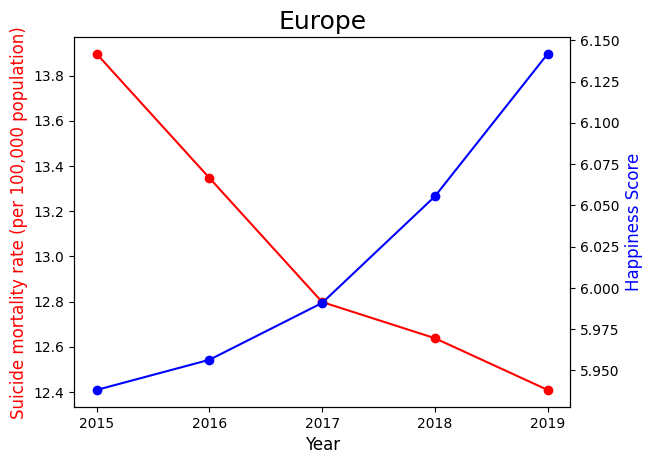

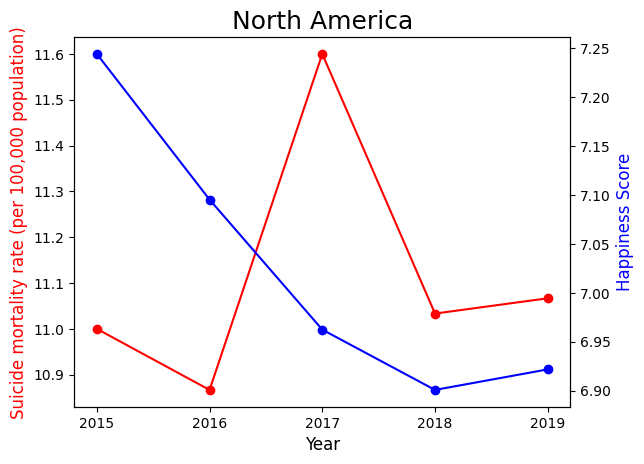

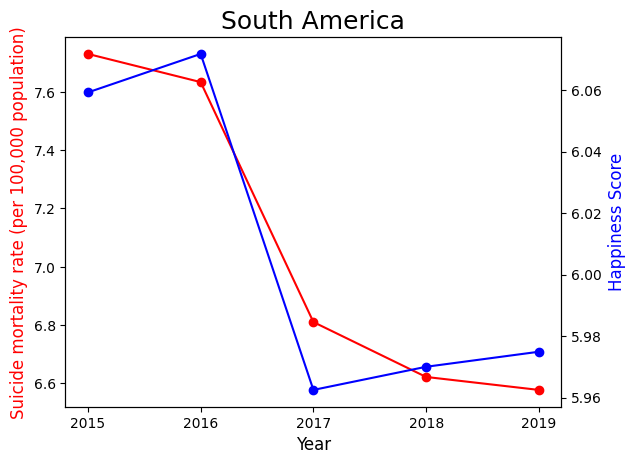

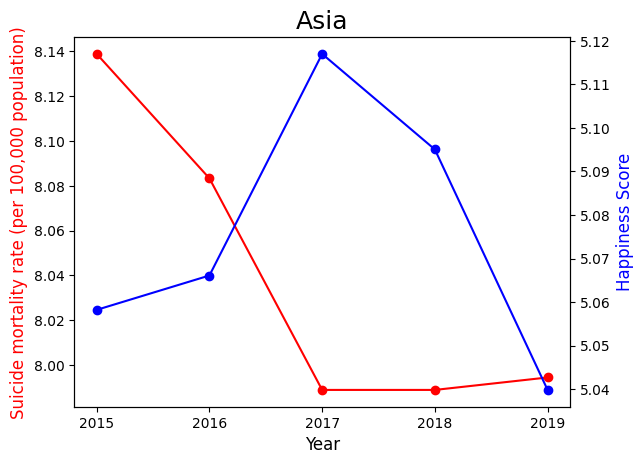

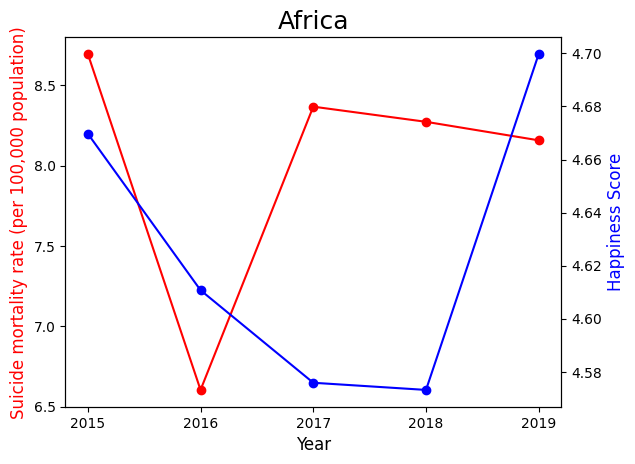

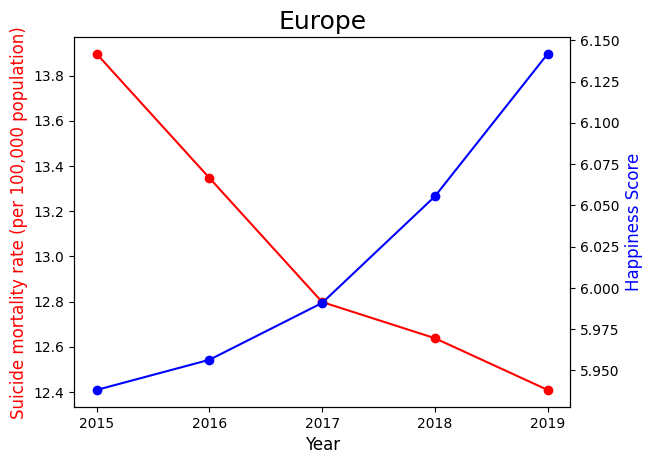

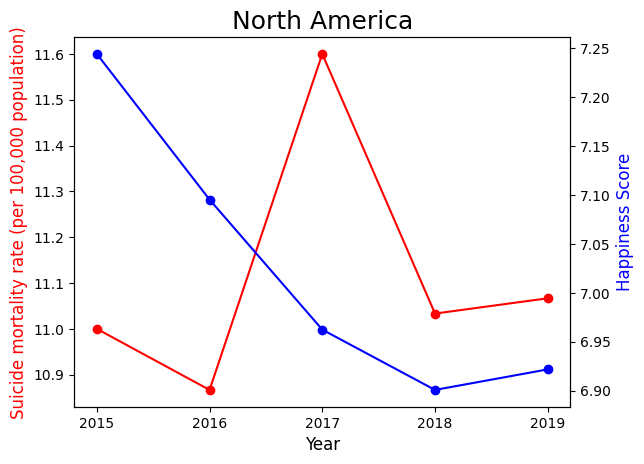

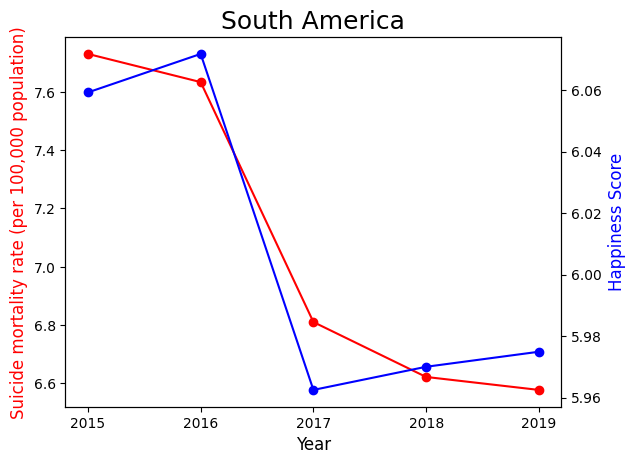

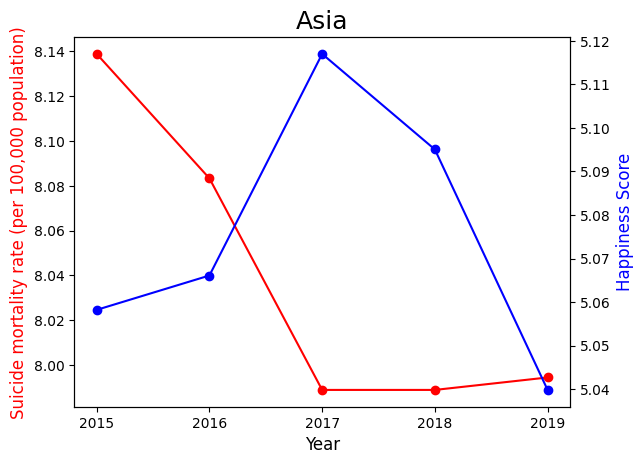

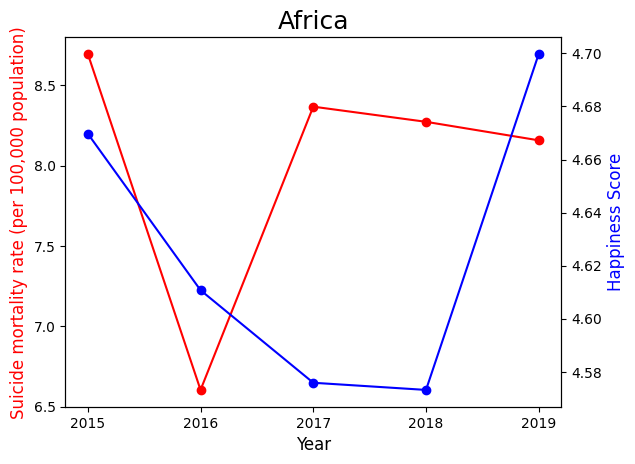

In [59]:
# Creating variables with column names because in future we put them into axes title
left_y = 'Suicide mortality rate (per 100,000 population)'
right_y = 'Happiness Score'

#
### Europe
#

fig_eu,ax_eu = plt.subplots()

# make a plot
ax_eu.plot(europe.reset_index()['Year'], europe[left_y], color="red", marker="o")
# set x-axis label
ax_eu.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_eu.set_ylabel(left_y,color="red",fontsize=12)
ax_eu_2=ax_eu.twinx()
# make a plot with different y-axis using second axis object
ax_eu_2.plot(europe.reset_index()['Year'], europe[right_y], color="blue",marker="o")
ax_eu_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_eu.set_title('Europe', fontsize=18)
# Setting major locator and xticklabels because without these settings axes with year will be like that [2015.0, 2015.5, ...]
ax_eu.xaxis.set_major_locator(mticker.FixedLocator(europe.reset_index()['Year']))
ax_eu.set_xticklabels(europe.reset_index()['Year'])
plt.show()

#
### North America
#

fig_na,ax_na = plt.subplots()

ax_na.plot(north_america.reset_index()['Year'], north_america[left_y], color="red", marker="o")
# set x-axis label
ax_na.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_na.set_ylabel(left_y,color="red",fontsize=12)
ax_na_2=ax_na.twinx()
# make a plot with different y-axis using second axis object
ax_na_2.plot(north_america.reset_index()['Year'], north_america[right_y], color="blue",marker="o")
ax_na_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_na.set_title('North America', fontsize=18)
ax_na.xaxis.set_major_locator(mticker.FixedLocator(europe.reset_index()['Year']))
ax_na.set_xticklabels(europe.reset_index()['Year'])
plt.show()

#
### South America
#

fig_sa,ax_sa = plt.subplots()

# make a plot
ax_sa.plot(south_america.reset_index()['Year'], south_america[left_y], color="red", marker="o")
# set x-axis label
ax_sa.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_sa.set_ylabel(left_y,color="red",fontsize=12)
ax_sa_2=ax_sa.twinx()
# make a plot with different y-axis using second axis object
ax_sa_2.plot(south_america.reset_index()['Year'], south_america[right_y], color="blue",marker="o")
ax_sa_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_sa.set_title('South America', fontsize=18)
ax_sa.xaxis.set_major_locator(mticker.FixedLocator(europe.reset_index()['Year']))
ax_sa.set_xticklabels(europe.reset_index()['Year'])
plt.show()

#
### Asia
#

fig_as,ax_as = plt.subplots()

# make a plot
ax_as.plot(asia.reset_index()['Year'], asia[left_y], color="red", marker="o")
# set x-axis label
ax_as.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_as.set_ylabel(left_y,color="red",fontsize=12)
ax_as_2=ax_as.twinx()
# make a plot with different y-axis using second axis object
ax_as_2.plot(asia.reset_index()['Year'], asia[right_y], color="blue",marker="o")
ax_as_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_as.set_title('Asia', fontsize=18)
ax_as.xaxis.set_major_locator(mticker.FixedLocator(europe.reset_index()['Year']))
ax_as.set_xticklabels(europe.reset_index()['Year'])
plt.show()

#
### Africa
#

fig_af,ax_af = plt.subplots()

# make a plot
ax_af.plot(africa.reset_index()['Year'], africa[left_y], color="red", marker="o")
# set x-axis label
ax_af.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_af.set_ylabel(left_y,color="red",fontsize=12)
ax_af_2=ax_af.twinx()
# make a plot with different y-axis using second axis object
ax_af_2.plot(africa.reset_index()['Year'], africa[right_y], color="blue",marker="o")
ax_af_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_af.set_title('Africa', fontsize=18)
ax_af.xaxis.set_major_locator(mticker.FixedLocator(europe.reset_index()['Year']))
ax_af.set_xticklabels(europe.reset_index()['Year'])
plt.show()


### In our opinion the most interesting and right results in Europe and NA. In Europe, we correlate that with a smaller suicide rate people are happier. In North America, we have similar results, but they aren't that clean. This is very interesting, and now we want to compare these two regions by other parameters and maybe compare some countries.

# 2. Compare happiness score and suicide rate from NA and EU the countries with max and min GDP.

### Get countries names with max and min GDP of NA and EU regions

In [60]:
# Get average GDP for each country to find min and max average GDP
temp = na[['Year', 'Country','GDP per capita, PPP (current international $)']].groupby(['Country']).mean()
min_na = temp[temp['GDP per capita, PPP (current international $)'] == temp.min()['GDP per capita, PPP (current international $)']].reset_index().at[0, 'Country']
max_na = temp[temp['GDP per capita, PPP (current international $)'] == temp.max()['GDP per capita, PPP (current international $)']].reset_index().at[0, 'Country']


temp = eu[['Year', 'Country','GDP per capita, PPP (current international $)']].groupby(['Country']).mean()
min_eu = temp[temp['GDP per capita, PPP (current international $)'] == temp.min()['GDP per capita, PPP (current international $)']].reset_index().at[0, 'Country']
max_eu = temp[temp['GDP per capita, PPP (current international $)'] == temp.max()['GDP per capita, PPP (current international $)']].reset_index().at[0, 'Country']


### Get information about countries

In [61]:
# Get data using country names
min_europe = eu[eu['Country'] == min_eu]
max_europe = eu[eu['Country'] == max_eu]

min_north_america = na[na['Country'] == min_na]
max_north_america = na[na['Country'] == max_na]


### Build line plots for every country

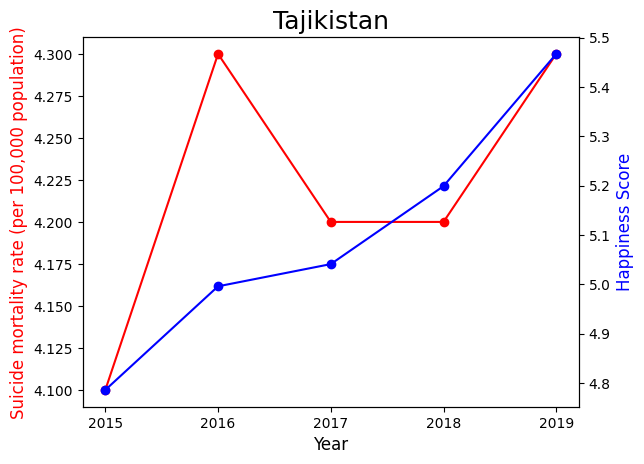

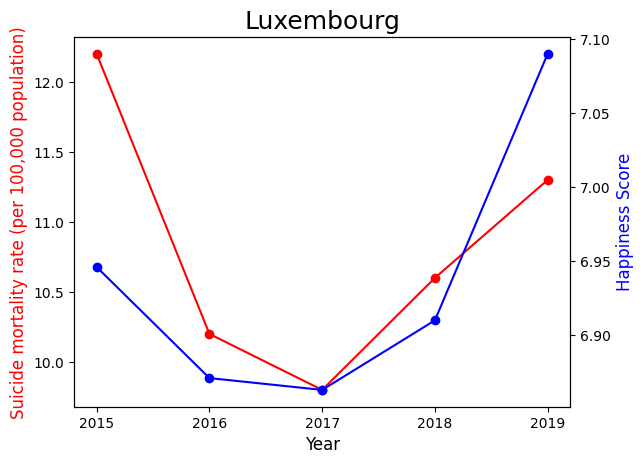

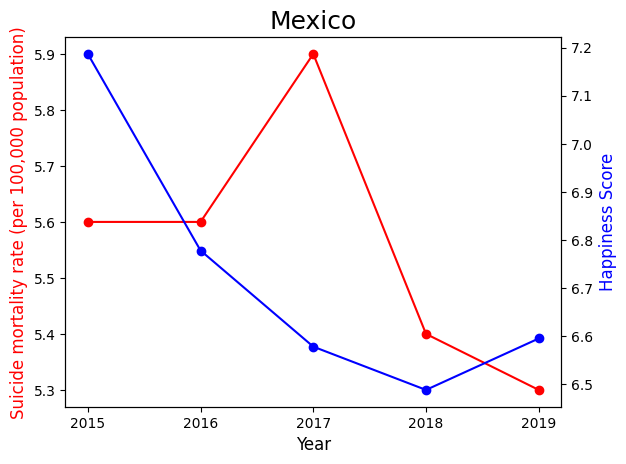

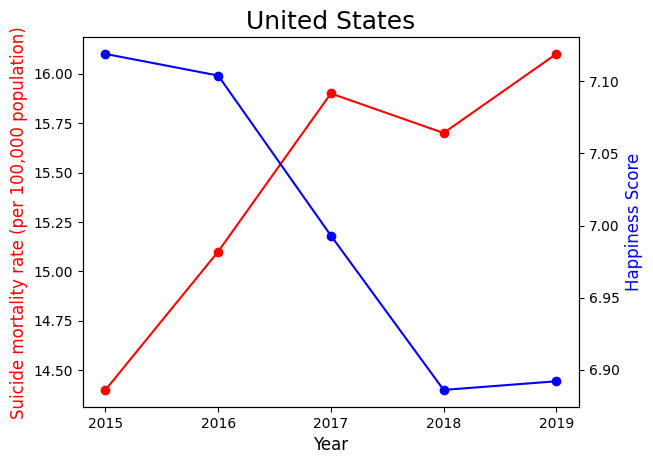

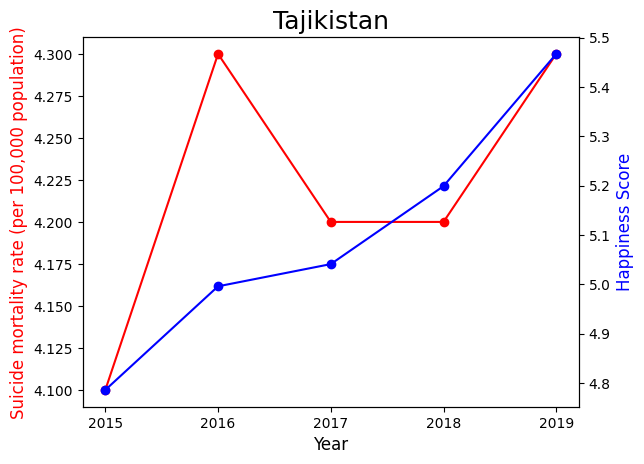

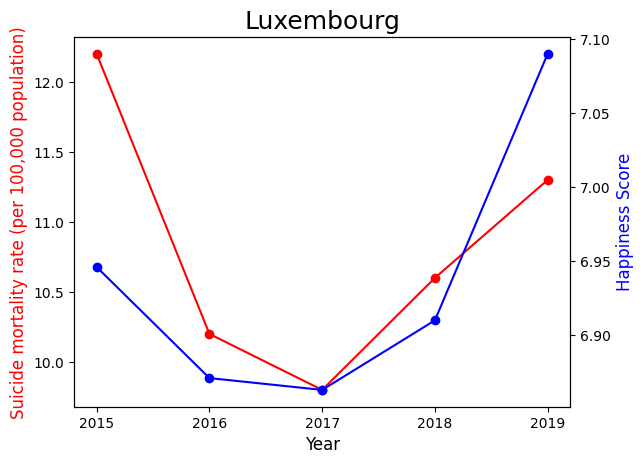

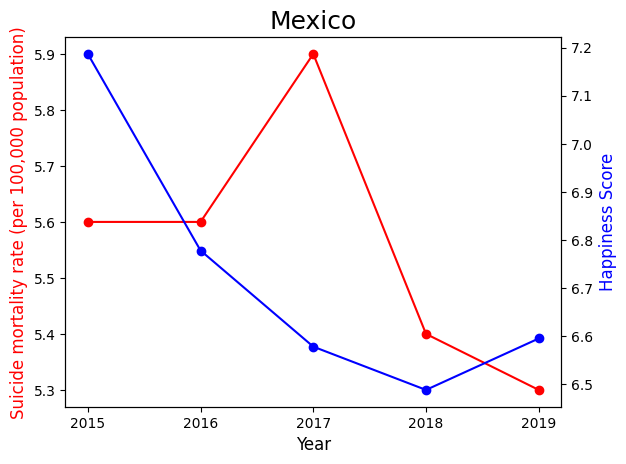

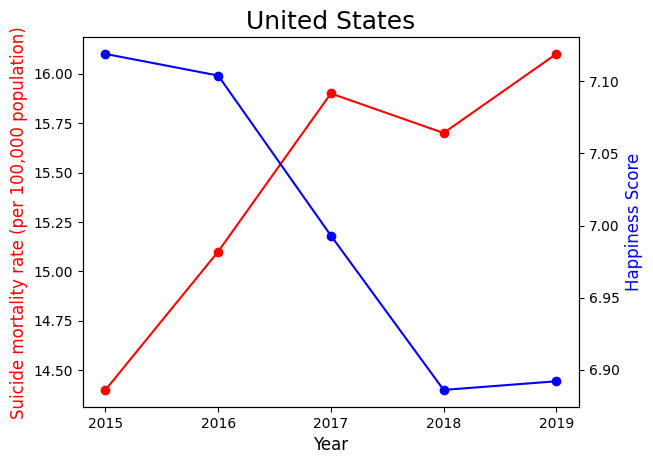

In [62]:
left_y = 'Suicide mortality rate (per 100,000 population)'
right_y = 'Happiness Score'

#
### Europe min
#

fig_min_eu,ax_min_eu = plt.subplots()

# make a plot
ax_min_eu.plot(min_europe.reset_index()['Year'], min_europe[left_y], color="red", marker="o")
# set x-axis label
ax_min_eu.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_min_eu.set_ylabel(left_y,color="red",fontsize=12)
ax_min_eu_2=ax_min_eu.twinx()
# make a plot with different y-axis using second axis object
ax_min_eu_2.plot(min_europe.reset_index()['Year'], min_europe[right_y], color="blue",marker="o")
ax_min_eu_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_min_eu.set_title(min_eu, fontsize=18)
ax_min_eu.xaxis.set_major_locator(mticker.FixedLocator(min_europe.reset_index()['Year']))
ax_min_eu.set_xticklabels(min_europe.reset_index()['Year'])
plt.show()

#
### Europe max
#

fig_max_eu,ax_max_eu = plt.subplots()

# make a plot
ax_max_eu.plot(max_europe.reset_index()['Year'], max_europe[left_y], color="red", marker="o")
# set x-axis label
ax_max_eu.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_max_eu.set_ylabel(left_y,color="red",fontsize=12)
ax_max_eu_2=ax_max_eu.twinx()
# make a plot with different y-axis using second axis object
ax_max_eu_2.plot(max_europe.reset_index()['Year'], max_europe[right_y], color="blue",marker="o")
ax_max_eu_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_max_eu.set_title(max_eu, fontsize=18)
ax_max_eu.xaxis.set_major_locator(mticker.FixedLocator(max_europe.reset_index()['Year']))
ax_max_eu.set_xticklabels(max_europe.reset_index()['Year'])
plt.show()

#
### North America min
#

fig_min_na,ax_min_na = plt.subplots()

# make a plot
ax_min_na.plot(min_north_america.reset_index()['Year'], min_north_america[left_y], color="red", marker="o")
# set x-axis label
ax_min_na.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_min_na.set_ylabel(left_y,color="red",fontsize=12)
ax_min_na_2 = ax_min_na.twinx()
# make a plot with different y-axis using second axis object
ax_min_na_2.plot(min_north_america.reset_index()['Year'], min_north_america[right_y], color="blue",marker="o")
ax_min_na_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_min_na.set_title(min_na, fontsize=18)
ax_min_na.xaxis.set_major_locator(mticker.FixedLocator(min_north_america.reset_index()['Year']))
ax_min_na.set_xticklabels(min_north_america.reset_index()['Year'])
plt.show()

#
### NA max
#

ffig_max_na,ax_max_na = plt.subplots()

# make a plot
ax_max_na.plot(max_north_america.reset_index()['Year'], max_north_america[left_y], color="red", marker="o")
# set x-axis label
ax_max_na.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_max_na.set_ylabel(left_y,color="red",fontsize=12)
ax_max_na_2 = ax_max_na.twinx()
# make a plot with different y-axis using second axis object
ax_max_na_2.plot(max_north_america.reset_index()['Year'], max_north_america[right_y], color="blue",marker="o")
ax_max_na_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_max_na.set_title(max_na, fontsize=18)
ax_max_na.xaxis.set_major_locator(mticker.FixedLocator(max_north_america.reset_index()['Year']))
ax_max_na.set_xticklabels(max_north_america.reset_index()['Year'])
plt.show()

# 3. Find the biggest producers of oil in NA and Europe, then find how the GDP of the countries was changing with changing of prices on oil

### Let's start with finding which country produces more oil both in EU and NA

In [63]:
# Get only records from 2015 to 2020 from df_oil_prod
df_oil_prod = df_oil_prod[(df_oil_prod['Year'] > 2014) & (df_oil_prod['Year'] < 2020)]

# Creating data frames where will be data only for specific region
na_oil = df_oil_prod[(df_oil_prod['Country'].isin(na['Country']))]
eu_oil = df_oil_prod[(df_oil_prod['Country'].isin(eu['Country']))]

# Get countries which produces the most
eu_oil = eu_oil.groupby('Country').sum().sort_values(by='Value', ascending=False).reset_index().head(1)
na_oil = na_oil.groupby('Country').sum().sort_values(by='Value', ascending=False).reset_index().head(1)
print('NA:\n' + str(na_oil[['Country','Value']]))
print('EU:\n' + str(eu_oil[['Country','Value']]))


NA:
         Country        Value
0  United States  1389534.063
EU:
  Country        Value
0  Russia  1562180.482


/tmp/ipykernel_42717/270830102.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eu_oil = eu_oil.groupby('Country').sum().sort_values(by='Value', ascending=False).reset_index().head(1)
/tmp/ipykernel_42717/270830102.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_oil = na_oil.groupby('Country').sum().sort_values(by='Value', ascending=False).reset_index().head(1)


NA:
         Country        Value
0  United States  1389534.063
EU:
  Country        Value
0  Russia  1562180.482


/tmp/ipykernel_42717/270830102.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  eu_oil = eu_oil.groupby('Country').sum().sort_values(by='Value', ascending=False).reset_index().head(1)
/tmp/ipykernel_42717/270830102.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  na_oil = na_oil.groupby('Country').sum().sort_values(by='Value', ascending=False).reset_index().head(1)


### Now when we found out required countries, we need to know the prices of the oil on 2015-2019 - for these purposes we use from df_commodity

In [64]:
oil_prices = df_commodity[(df_commodity['Year'] > 2014) & (df_commodity['Year'] <= 2019) & (df_commodity['Symbol'] == 'Brent Oil')][['Symbol', 'Year', 'Open']]
oil_prices

,Symbol,Year,Open
15,Brent Oil,2015,53.240
16,Brent Oil,2016,46.705
17,Brent Oil,2017,54.520
18,Brent Oil,2018,72.850
19,Brent Oil,2019,63.385


,Symbol,Year,Open
15,Brent Oil,2015,53.240
16,Brent Oil,2016,46.705
17,Brent Oil,2017,54.520
18,Brent Oil,2018,72.850
19,Brent Oil,2019,63.385


### After that we need to merge our df's and draw plots

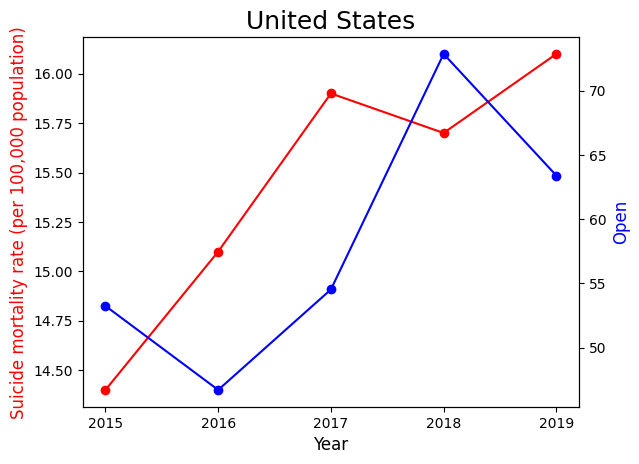

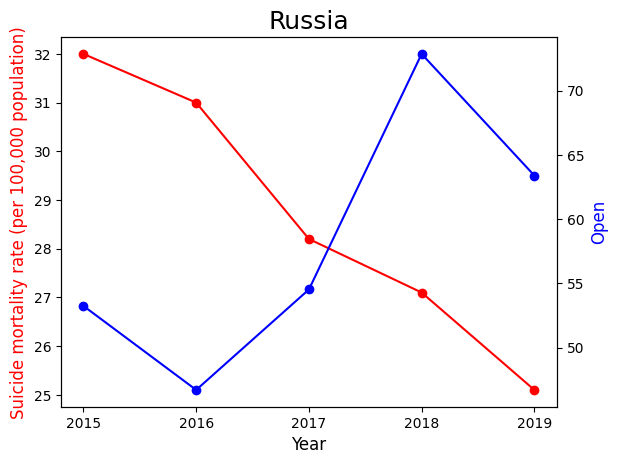

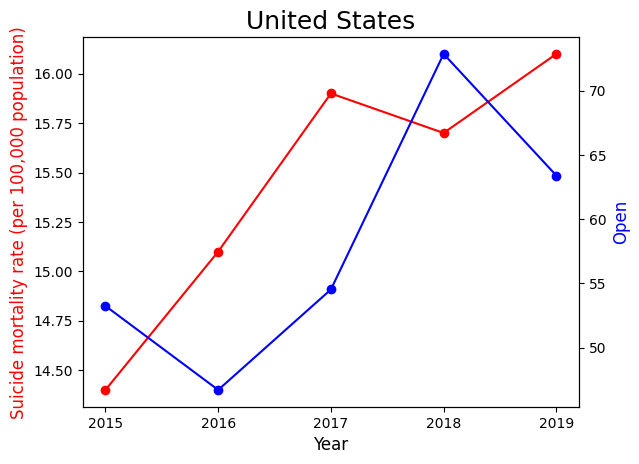

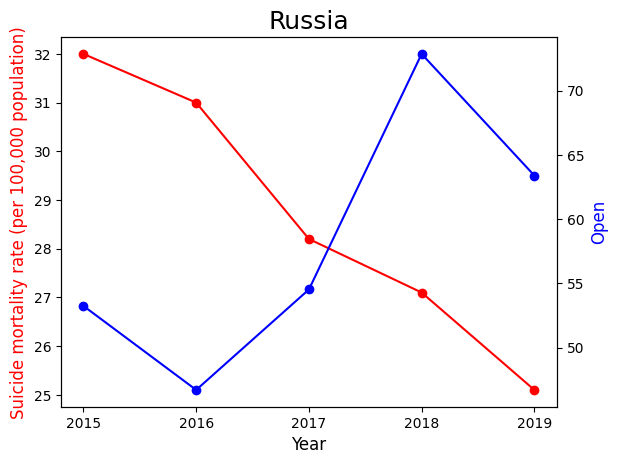

In [65]:
# Get data about country by its name
north_america_oil = na[na['Country'] == na_oil.at[0, 'Country']]
europe_oil = eu[eu['Country'] == eu_oil.at[0, 'Country']]


left_y = 'Suicide mortality rate (per 100,000 population)'
right_y = 'Open'

fig_oil_na,ax_oil_na = plt.subplots()

# make a plot
ax_oil_na.plot(north_america_oil.reset_index()['Year'], north_america_oil[left_y], color="red", marker="o")
# set x-axis label
ax_oil_na.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_oil_na.set_ylabel(left_y,color="red",fontsize=12)
ax_oil_na_2 = ax_oil_na.twinx()
# make a plot with different y-axis using second axis object
ax_oil_na_2.plot(oil_prices.reset_index()['Year'], oil_prices[right_y], color="blue",marker="o")
ax_oil_na_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_oil_na.set_title( na_oil.at[0, 'Country'], fontsize=18)
ax_oil_na.xaxis.set_major_locator(mticker.FixedLocator(oil_prices.reset_index()['Year']))
ax_oil_na.set_xticklabels(oil_prices.reset_index()['Year'])
plt.show()

fig_oil_eu,ax_oil_eu = plt.subplots()

# make a plot
ax_oil_eu.plot(europe_oil.reset_index()['Year'], europe_oil[left_y], color="red", marker="o")
# set x-axis label
ax_oil_eu.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_oil_eu.set_ylabel(left_y,color="red",fontsize=12)
ax_max_na_2 = ax_oil_eu.twinx()
# make a plot with different y-axis using second axis object
ax_max_na_2.plot(oil_prices.reset_index()['Year'], oil_prices[right_y], color="blue",marker="o")
ax_max_na_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_oil_eu.set_title( eu_oil.at[0, 'Country'], fontsize=18)
ax_oil_eu.xaxis.set_major_locator(mticker.FixedLocator(europe_oil.reset_index()['Year']))
ax_oil_eu.set_xticklabels(europe_oil.reset_index()['Year'])
plt.show()

### As we can see there is a dependence between the suicide rate and the price of brent oil.
### But there is no correlation between oil prices and the suicide rate in the US, and we decide to make another comparison between these countries.

# 4. How female and male suicide rate changing with GDP in countries which are the biggest producers of oil

### At first, like usual, get data only for 2015-2019

In [66]:
mf_suicides = df_mf_suicides[(df_mf_suicides['Year'] > 2014) & (df_mf_suicides['Year'] <= 2019)]

### In the next step we need to add a Region column to our df

In [67]:
# Take only columns that we needed
eu_mf = mf_suicides[mf_suicides['Country'] == eu_oil.at[0, 'Country']][['Year','Both sexes.1', 'Male.1','Female.1']]
na_mf = mf_suicides[mf_suicides['Country'] == na_oil.at[0, 'Country']][['Year','Both sexes.1', 'Male.1','Female.1']]

# Add column 'Country' to merge these datasets with data from happiness rank dataset
eu_mf['Country'] = eu_oil.at[0, 'Country']
na_mf['Country'] = na_oil.at[0, 'Country']

# Merge 2 dataframes to get desired data
eu_mf = pd.merge(eu_mf, eu[['Country', 'Year','Economy (GDP per Capita)']], on=(['Country', 'Year']))
na_mf = pd.merge(na_mf, na[['Country', 'Year','Economy (GDP per Capita)']], on=(['Country', 'Year']))


# Make a plots

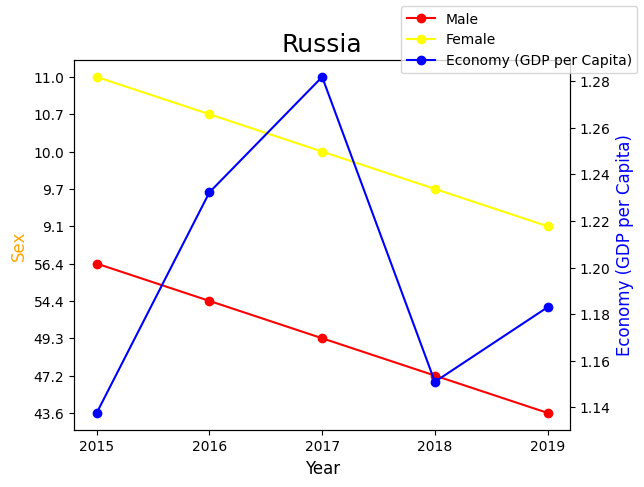

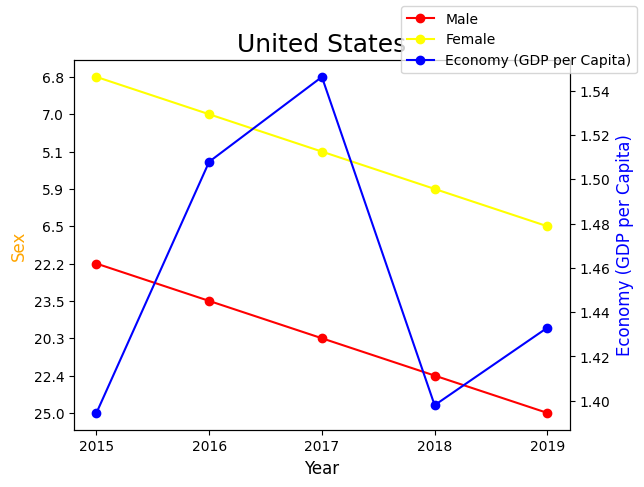

,Year,Both sexes.1,Male.1,Female.1,Country,Economy (GDP per Capita)
0,2019,15.1 [15.1-19.9],25.0,6.5,United States,1.433000
1,2018,14.1 [14.7-19.5],22.4,5.9,United States,1.398000
2,2017,13.2 [15.0-19.7],20.3,5.1,United States,1.546259
3,2016,15.1 [14.4-18.5],23.5,7.0,United States,1.507960
4,2015,14.4 [13.8-17.0],22.2,6.8,United States,1.394510


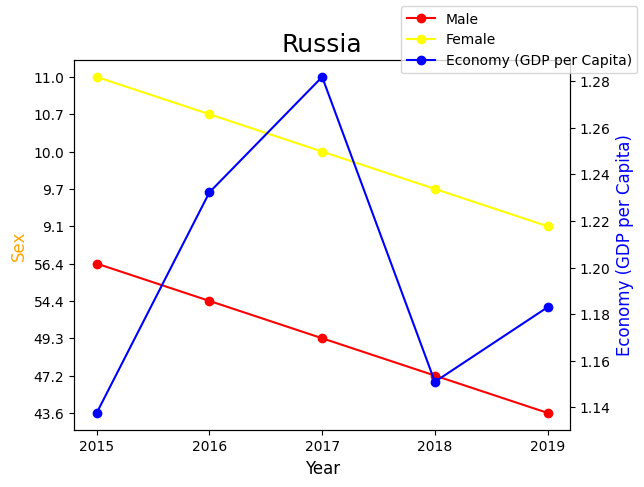

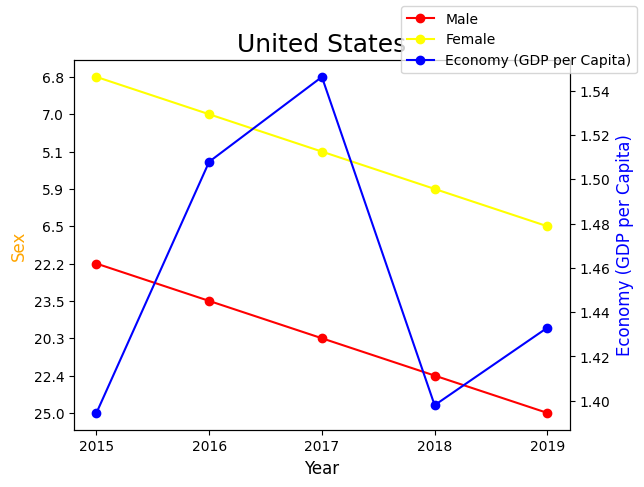

,Year,Both sexes.1,Male.1,Female.1,Country,Economy (GDP per Capita)
0,2019,15.1 [15.1-19.9],25.0,6.5,United States,1.433000
1,2018,14.1 [14.7-19.5],22.4,5.9,United States,1.398000
2,2017,13.2 [15.0-19.7],20.3,5.1,United States,1.546259
3,2016,15.1 [14.4-18.5],23.5,7.0,United States,1.507960
4,2015,14.4 [13.8-17.0],22.2,6.8,United States,1.394510


In [68]:
left_y_1 = 'Male.1'
left_y_2 = 'Female.1'
right_y = 'Economy (GDP per Capita)'

fig_mf_eu,ax_mf_eu = plt.subplots()

# make a plot
ax_mf_eu.plot(eu_mf['Year'], eu_mf[left_y_1], color="red", marker="o", label="Male")
ax_mf_eu.plot(eu_mf['Year'], eu_mf[left_y_2], color="yellow", marker="o", label="Female")
# set x-axis label
ax_mf_eu.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_mf_eu.set_ylabel('Sex',color="orange",fontsize=12)
ax_mf_eu_2 = ax_mf_eu.twinx()
# make a plot with different y-axis using second axis object
ax_mf_eu_2.plot(eu_mf['Year'], eu_mf[right_y], color="blue",marker="o", label="Economy (GDP per Capita)")
ax_mf_eu_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_mf_eu.set_title( eu_mf.at[0, 'Country'], fontsize=18)
ax_mf_eu.xaxis.set_major_locator(mticker.FixedLocator(eu_mf['Year']))
ax_mf_eu.set_xticklabels(eu_mf['Year'])
fig_mf_eu.legend(loc='upper right')
plt.show()



fig_mf_na,ax_mf_na = plt.subplots()

# make a plot
ax_mf_na.plot(na_mf['Year'], na_mf[left_y_1], color="red", marker="o", label="Male")
ax_mf_na.plot(na_mf['Year'], na_mf[left_y_2], color="yellow", marker="o", label="Female")
# set x-axis label
ax_mf_na.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_mf_na.set_ylabel('Sex',color="orange",fontsize=12)
ax_mf_na_2 = ax_mf_na.twinx()
# make a plot with different y-axis using second axis object
ax_mf_na_2.plot(na_mf['Year'], na_mf[right_y], color="blue",marker="o", label="Economy (GDP per Capita)")
ax_mf_na_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_mf_na.set_title( na_mf.at[0, 'Country'], fontsize=18)
ax_mf_na.xaxis.set_major_locator(mticker.FixedLocator(na_mf['Year']))
ax_mf_na.set_xticklabels(na_mf['Year'])
fig_mf_na.legend(loc='upper right')
plt.show()
na_mf

---
# 5. How happiness score was changing because of total crimes in countries above (Russia , US)
### Cause of the reason we want to know total crimes in US we need to sum values from all columns for each year

In [69]:
# Creating column that wiil be a sum of all crimes in us for each year.
df_us_crimes['Total_crimes'] = df_us_crimes.violent_crime + df_us_crimes.homicide + df_us_crimes.rape_revised + df_us_crimes.robbery + df_us_crimes.aggravated_assault + df_us_crimes.property_crime + df_us_crimes.burglary + df_us_crimes.larceny + df_us_crimes.motor_vehicle_theft
# Creating a new df that will be containing data about all crimes both in US and Russia
crimes_us = df_us_crimes[['year','Total_crimes']].rename(columns={'year': 'Year'})
crimes_us

/tmp/ipykernel_42717/2106149049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_crimes['Total_crimes'] = df_us_crimes.violent_crime + df_us_crimes.homicide + df_us_crimes.rape_revised + df_us_crimes.robbery + df_us_crimes.aggravated_assault + df_us_crimes.property_crime + df_us_crimes.burglary + df_us_crimes.larceny + df_us_crimes.motor_vehicle_theft


,Year,Total_crimes
1856,2015,18481723.0
1908,2016,18428272.0
2011,2017,17933726.0
2063,2018,16942966.0
2115,2019,16342174.0


/tmp/ipykernel_42717/2106149049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_crimes['Total_crimes'] = df_us_crimes.violent_crime + df_us_crimes.homicide + df_us_crimes.rape_revised + df_us_crimes.robbery + df_us_crimes.aggravated_assault + df_us_crimes.property_crime + df_us_crimes.burglary + df_us_crimes.larceny + df_us_crimes.motor_vehicle_theft


,Year,Total_crimes
1856,2015,18481723.0
1908,2016,18428272.0
2011,2017,17933726.0
2063,2018,16942966.0
2115,2019,16342174.0


### Create new data frame with the data about crimes in Russia

In [70]:
crimes_ru = df_ru_crimes.reset_index()[['Year', 'Total_crimes']]
crimes_ru

,Year,Total_crimes
0,2015,2388476.0
1,2016,2160063.0
2,2017,2058476.0
3,2018,1991532.0
4,2019,2024337.0


,Year,Total_crimes
0,2015,2388476.0
1,2016,2160063.0
2,2017,2058476.0
3,2018,1991532.0
4,2019,2024337.0


### Then we need to add to our data frames a new column "Happiness Score"

In [71]:
crimes_ru = pd.merge(crimes_ru, df_happiness[(df_happiness['Country'] == 'Russia') & (df_happiness['Year'] < 2020)][['Year', 'Happiness Score']], on='Year')

crimes_us = pd.merge(crimes_us, df_happiness[(df_happiness['Country'] == 'United States') & (df_happiness['Year'] < 2020)][['Year', 'Happiness Score']], on='Year')
crimes_us

,Year,Total_crimes,Happiness Score
0,2015,18481723.0,7.119
1,2016,18428272.0,7.104
2,2017,17933726.0,6.993
3,2018,16942966.0,6.886
4,2019,16342174.0,6.892


,Year,Total_crimes,Happiness Score
0,2015,18481723.0,7.119
1,2016,18428272.0,7.104
2,2017,17933726.0,6.993
3,2018,16942966.0,6.886
4,2019,16342174.0,6.892


### Creating plots

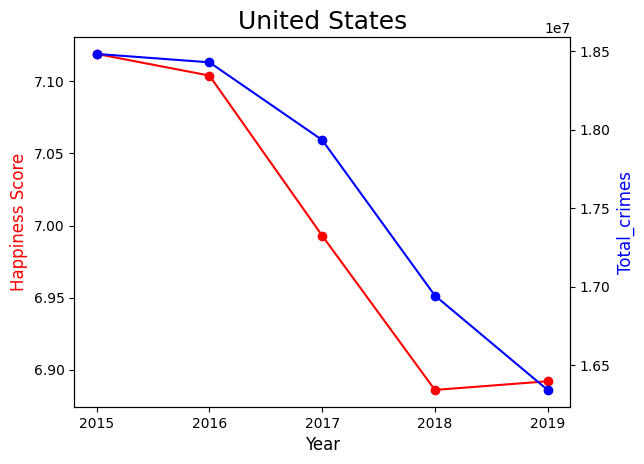

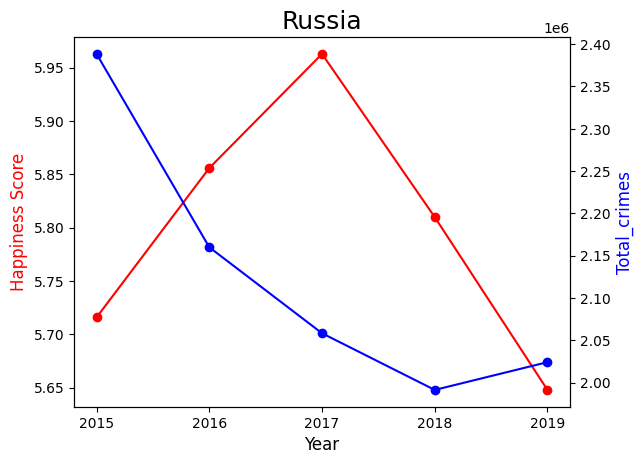

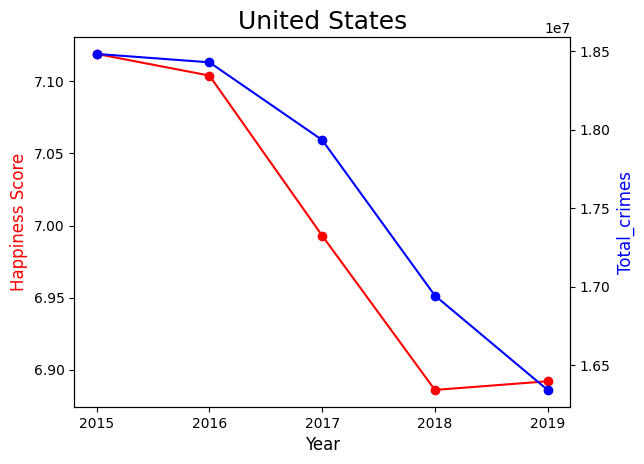

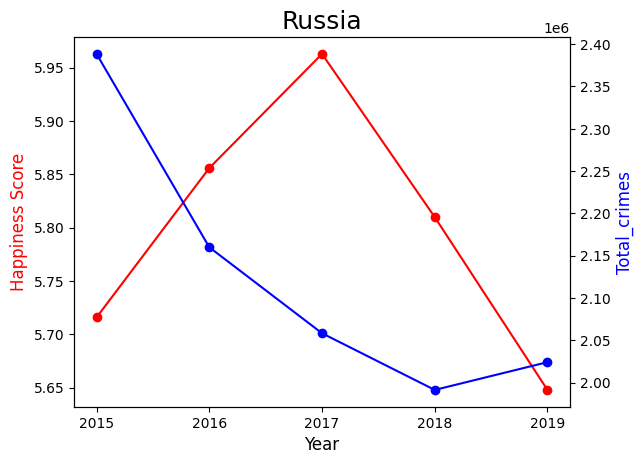

In [72]:
left_y = 'Happiness Score'
right_y = 'Total_crimes'

fig_crimes_us,ax_crimes_us = plt.subplots()

# make a plot
ax_crimes_us.plot(crimes_us['Year'], crimes_us[left_y], color="red", marker="o")
# set x-axis label
ax_crimes_us.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_crimes_us.set_ylabel(left_y,color="red",fontsize=12)
ax_crimes_us_2 = ax_crimes_us.twinx()
# make a plot with different y-axis using second axis object
ax_crimes_us_2.plot(crimes_us['Year'], crimes_us[right_y], color="blue",marker="o")
ax_crimes_us_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_crimes_us.set_title( 'United States', fontsize=18)
ax_crimes_us.xaxis.set_major_locator(mticker.FixedLocator(crimes_us['Year']))
ax_crimes_us.set_xticklabels(crimes_us['Year'])
plt.show()

fig_crimes_ru,ax_crimes_ru = plt.subplots()

# make a plot
ax_crimes_ru.plot(crimes_ru['Year'], crimes_ru[left_y], color="red", marker="o")
# set x-axis label
ax_crimes_ru.set_xlabel("Year",fontsize=12)
# set y-axis label
ax_crimes_ru.set_ylabel(left_y,color="red",fontsize=12)
ax_crimes_ru_2 = ax_crimes_ru.twinx()
# make a plot with different y-axis using second axis object
ax_crimes_ru_2.plot(crimes_ru['Year'], crimes_ru[right_y], color="blue",marker="o")
ax_crimes_ru_2.set_ylabel(right_y,color="blue",fontsize=12)
ax_crimes_ru.set_title( 'Russia', fontsize=18)
ax_crimes_ru.xaxis.set_major_locator(mticker.FixedLocator(crimes_ru['Year']))
ax_crimes_ru.set_xticklabels(crimes_ru['Year'])
plt.show()

---
# Conclusion

### In this project we revealed some trends and correlations between various parameters in a group with suicide rate and happiness score.
### In the first sub-goal we found out that in Europe there is a strong correlation between suicide rate and happiness score - when the happiness score is big then the suicide rate is low and vice-versa. A similar but not that strong correlation was in North America. Mostly because of these reasons we've chosen these two regions and delved deeper.
### In the second sub-goal, we tried to do the same as in the first study, but this time we took the poorest and richest countries from both North America and Europe. And after we saw the results, we found that in the US we have a strong correlation, but in Mexico, we don't, and we think that Mexico broke that correlation when we last did the same study with regions. In the situation with Europe, we did not find anything interesting
### In the third sub-goal, we tried to delve more into the US, and the cause of its correlation in the last two explorations. Because the US is one of the top countries producents of oil we made this type of exploration. At the end of the exploration, we found that Russia is dependent on oil prices, but the US is not.
### So in the fourth, we want to see if sex is perhaps the main predictor of suicide rates when GDP per capita is the cause. And after reconnaissance, we found that in Russia there is no such correlation, but in the USA there is - in 2017 there was a peak in GDP per capita in the USA and this time there was a decrease in the suicide rate.
### In fifth we tried to figure out is there a dependence between crimes and happiness scores in US and Russia, besides that now we know that in Russia there are more crimes than in the US we now know that there is a strange correlation between crimes and happiness score in the US, when there are fewer crimes there is less happiness score, but we think that it means that there is no correlation in the US for these parameters. In Russia, we have a weak correlation at the beginning but then there is no correlation.
### At the end of the conclusion, we want to say that we have reached our main goal and there are real correlations between different parameters in a group with suicide rate and happiness score but not every time.